# Word Representation

### One Hot Vector

In [215]:
from konlpy.tag import Mecab

qna_data = [
                ['안녕', '만나서 반가워']
                ,['넌누구니', '나는 AI 봇이란다.']
#                 ,['피자 주문 할께', '페파로니 주문해줘']
#                ,['음료는 멀로', '콜라로 해줘']
            ]
mecab = Mecab('/usr/local/lib/mecab/dic/mecab-ko-dic')

train_data = list(map(lambda x : mecab.morphs(' '.join(x)) , qna_data))

import itertools
train_data = list(itertools.chain.from_iterable(train_data))
print(list(train_data))

['안녕', '만나', '서', '반가워', '넌', '누구', '니', '나', '는', 'AI', '봇', '이', '란다', '.']


In [216]:
import numpy as np
bucket = np.zeros(len(train_data), dtype=np.float)

for word in train_data :
    bucket_temp = bucket.copy()
    np.put(bucket_temp, train_data.index(word), 1)
    print(bucket_temp)

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


### Word to Vector (By Gensim)

In [217]:
from gensim.models import word2vec

In [218]:
train_data = [train_data]
print(train_data)

model = word2vec.Word2Vec(size=50, window=2, min_count=1)
model.build_vocab(train_data)
model.train(train_data)
print("model check : {0}".format(model))

[['안녕', '만나', '서', '반가워', '넌', '누구', '니', '나', '는', 'AI', '봇', '이', '란다', '.']]
model check : Word2Vec(vocab=14, size=50, alpha=0.025)


In [219]:
model.save("./model/w2v.bin")
model = word2vec.Word2Vec.load("./model/w2v.bin")
print("model load check : {0}".format(model))

model load check : Word2Vec(vocab=14, size=50, alpha=0.025)


In [226]:
print(model.wv.index2word)
X = model[vocab]

['니', '반가워', '서', '안녕', '나', '봇', '는', '넌', '만나', '.', 'AI', '란다', '누구', '이']


In [221]:
print(model['안녕'])

[-0.00526203  0.00806998  0.00641448 -0.00928741 -0.00855247  0.00492507
 -0.00859462 -0.00037459  0.00933697  0.00716154 -0.00226713  0.00577714
 -0.00329574  0.00828057  0.00307698  0.00418518 -0.00317836 -0.00101071
 -0.00386956 -0.00254121  0.0071705   0.00319552  0.00326385 -0.00578259
  0.00496802  0.00058807 -0.00067259  0.00604457 -0.00596926  0.00534698
 -0.00685895 -0.00403529 -0.0003595  -0.00023321 -0.00221119  0.00581193
 -0.00521137  0.00967642  0.00586663 -0.00576562 -0.00960775  0.00611615
 -0.00551613  0.00968471 -0.00190675 -0.0046259   0.00482867 -0.0004681
  0.00250024  0.00866917]


In [222]:
print(model['AI'])

[ 0.00438941 -0.00715526 -0.00583306  0.00407398  0.00210139 -0.00214126
  0.00438984  0.00700825  0.00527689  0.00105609  0.0074855  -0.00216613
 -0.00099419 -0.00515468 -0.00518973 -0.0003004   0.00222211  0.00799839
 -0.00928703 -0.00358757  0.00876947  0.00976897  0.00413877  0.00184954
 -0.0007063   0.00578237 -0.00201256  0.00964103  0.00515814  0.00872782
  0.00305379  0.00733969 -0.00929801 -0.00426201 -0.00361304 -0.00214128
 -0.00733967  0.00361662  0.00065663 -0.00482805 -0.00148609  0.00028074
 -0.00482856  0.00806901  0.00454324 -0.00350351 -0.00691609  0.00722048
  0.00565263  0.0017324 ]


In [223]:
result1 = model.most_similar(positive='나', negative='', topn=10)
print(result1)

[('AI', 0.24458643794059753), ('란다', 0.19687707722187042), ('니', 0.16758158802986145), ('넌', 0.08362051844596863), ('안녕', 0.05428691953420639), ('만나', -0.005056455731391907), ('이', -0.02267487905919552), ('는', -0.04669147729873657), ('.', -0.2193285971879959), ('반가워', -0.23325154185295105)]


           x         y word
0   0.000062  0.000122    니
1  -0.000064 -0.000047  반가워
2   0.000036 -0.000097    서
3  -0.000099 -0.000056   안녕
4   0.000183  0.000002    나
5   0.000097 -0.000132    봇
6  -0.000040 -0.000171    는
7  -0.000016 -0.000090    넌
8  -0.000021  0.000182   만나
9  -0.000225 -0.000041    .
10 -0.000220  0.000004   AI
11  0.000120 -0.000077   란다
12  0.000153 -0.000081   누구
13 -0.000140 -0.000029    이


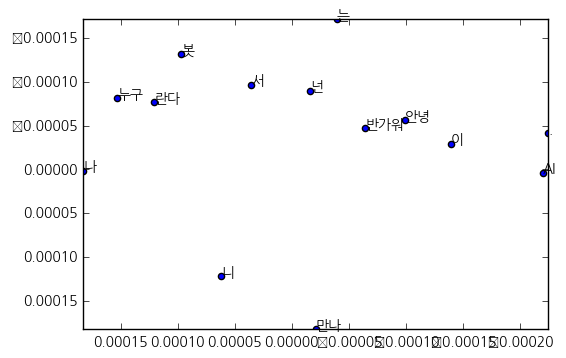

In [224]:
from sklearn.manifold import TSNE
import pandas as pd

font_name = matplotlib.font_manager.FontProperties(
                fname="/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 한글 폰트 위치를 넣어주세요
            ).get_name()
vocab = model.wv.index2word
matplotlib.rc('font', family=font_name)
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
df = pd.concat([pd.DataFrame(X_tsne),
                pd.Series(vocab)],
               axis=1)

df.columns = ['x', 'y', 'word']
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
print(df)
ax.scatter(df['x'], df['y'])
ax.set_xlim(df['x'].max(), df['x'].min())
ax.set_ylim(df['y'].max(), df['y'].min())
for i, txt in enumerate(df['word']):
    ax.annotate(txt, (df['x'].iloc[i], df['y'].iloc[i]))
plt.show()